In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore') 
import urllib.request 
import json 
from pandas.io.json import json_normalize 
from bs4 import BeautifulSoup
import seaborn as sns

from matplotlib import font_manager, rc
plt.rc("font", family = 'Malgun Gothic')
sns.set(font='Malgun Gothic', 
rc={"axes.unicode_minus":False}, style='whitegrid')


In [2]:
import requests
import json
import pprint
# 부산 440,410,710,290,170,260,230,320,530,380,140,500,470,200,110,350
url = 'http://apis.data.go.kr/B552061/jaywalking/getRestJaywalking'
params ={'serviceKey' : 'QmnwzKg91T496WKWEYKjgb+HQChmcpkc7+DY46Q45S3wwbpYjuyIT5mlyv6h4nk5EPbZLDqniiR0KW1JAOUdxw==', 
         'searchYearCd' : ['2012','2013','2014','2015', '2016', '2017', '2018', '2019', '2020'], 
         'siDo' : '11', # '26', '27', '28', '29', '30', '31', '36', '41', '42', '43', '44', '45', '46','47','48','50'
         'guGun' : ['680', '740', '305', '500', '620', '215', '530', '545', 
                    '350', '320', '230', '590', '440', '410', '650', '200', 
                    '290', '710', '470', '560', '170', '380', '110', '140', '260'],
         'type' : 'json', 
         'numOfRows' : '10000', 
         'pageNo' : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] }

response = requests.get(url, params=params)

In [3]:
response

<Response [200]>

In [4]:
contents = response.text
json_ob = json.loads(contents)
item = json_ob['items']['item']
df = json_normalize(item)
df[:2]

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd
0,167320,2013114,1168010500,111122001,서울 서울강남1,서울특별시 강남구 삼성동(원혜빌딩 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0568688...",127.05446947119,37.508720365953
1,167392,2013114,1168010500,111122002,서울 서울강남2,서울특별시 강남구 삼성동(삼성역 부근),6,6,1,4,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0657286...",127.063329279024,37.508654302655


In [5]:
contents = response.text
# contents
pp = pprint.PrettyPrinter(indent=4)
# print(pp.pprint(contents))

In [6]:
json_ob = json.loads(contents)
json_ob['totalCount']

8

In [7]:
print(type(json_ob))

<class 'dict'>


In [8]:
item = json_ob['items']['item']
print(item)

[{'afos_fid': 167320, 'afos_id': '2013114', 'bjd_cd': '1168010500', 'spot_cd': '111122001', 'sido_sgg_nm': '서울 서울강남1', 'spot_nm': '서울특별시 강남구 삼성동(원혜빌딩 부근)', 'occrrnc_cnt': 4, 'caslt_cnt': 4, 'dth_dnv_cnt': 0, 'se_dnv_cnt': 3, 'sl_dnv_cnt': 1, 'wnd_dnv_cnt': 0, 'geom_json': '{"type":"Polygon","coordinates":[[[127.0568688,37.5106317],[127.0564639,37.5109071],[127.0560099,37.5111288],[127.055518,37.5112911],[127.0550003,37.5113901],[127.0544695,37.5114234],[127.0539387,37.5113901],[127.0534209,37.5112911],[127.052929,37.5111288],[127.052475,37.5109071],[127.0520701,37.5106317],[127.0517244,37.5103091],[127.0514462,37.5099475],[127.0512424,37.5095556],[127.0511181,37.5091432],[127.0510764,37.5087203],[127.0511182,37.5082975],[127.0512425,37.507885],[127.0514463,37.5074932],[127.0517245,37.5071315],[127.0520703,37.506809],[127.0524751,37.5065336],[127.0529291,37.506312],[127.053421,37.5061496],[127.0539387,37.5060506],[127.0544695,37.5060174],[127.0550002,37.5060506],[127.055518,37.5061496],

In [9]:
df = json_normalize(item)
df[:2]

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd
0,167320,2013114,1168010500,111122001,서울 서울강남1,서울특별시 강남구 삼성동(원혜빌딩 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0568688...",127.05446947119,37.508720365953
1,167392,2013114,1168010500,111122002,서울 서울강남2,서울특별시 강남구 삼성동(삼성역 부근),6,6,1,4,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0657286...",127.063329279024,37.508654302655


In [10]:
len(df.columns)

15

In [11]:
from urllib.parse import urlencode, quote_plus
import requests
import pandas as pd

# 서울 보행자무단횡단사고다발지역정보

url = 'http://apis.data.go.kr/B552061/jaywalking/getRestJaywalking'
year_param = ['2012','2013','2014','2015', '2016', '2017', '2018', '2019', '2020']
guGun_param = ['680', '740', '305', '500', '620', '215', '530', '545', '350', 
               '320', '230', '590', '440', '410', '650', '200', '290', '710', 
               '470', '560', '170', '380', '110', '140', '260']

data = pd.DataFrame()

for i in range(0, len(guGun_param)):
    for j in range(0, len(year_param)):
        params ={'serviceKey' : 'QmnwzKg91T496WKWEYKjgb+HQChmcpkc7+DY46Q45S3wwbpYjuyIT5mlyv6h4nk5EPbZLDqniiR0KW1JAOUdxw==', 
         'searchYearCd' : year_param[j], 
         'siDo' : '11', # '26', '27', '28', '29', '30', '31', '36', '41', '42', '43', '44', '45', '46','47','48','50'
         'guGun' : guGun_param[i],
         'type' : 'json', 
         'numOfRows' : '100', 
         'pageNo' :'1' }
        response = requests.get(url, params)
        contents = response.text
        
        # payload = 'servicekey=' + serviceKey + '&' + 'searchYearCd' + year_param[j] + '&' +'siDo=11' + 'guGun='+ guGun_param[i] +'type=xml&numOfRows=10&pageNo=1'
        
        json_ob = json.loads(contents)
        item = json_ob['items']['item']
        
        df = json_normalize(item)
        data = pd.concat([data, df])

In [12]:
data.shape

(589, 15)

In [13]:
data.head(2)

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd
0,167320,2013114,1168010500,111122001,서울 서울강남1,서울특별시 강남구 삼성동(원혜빌딩 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0568688...",127.05446947119,37.508720365953
1,167392,2013114,1168010500,111122002,서울 서울강남2,서울특별시 강남구 삼성동(삼성역 부근),6,6,1,4,1,0,"{""type"":""Polygon"",""coordinates"":[[[127.0657286...",127.063329279024,37.508654302655


In [14]:
geom_json = data['geom_json']
data.drop('geom_json', axis=1 ,inplace=True)

In [15]:
data.sido_sgg_nm.value_counts()

서울 서울관악2       8
서울 서울노원1       8
서울 서울금천2       8
서울 서울서대문1      8
서울 서울강북1       8
              ..
서울특별시 서대문구2    1
서울특별시 서대문구1    1
서울특별시 관악구1     1
서울특별시 관악구2     1
서울 서울중랑11      1
Name: sido_sgg_nm, Length: 190, dtype: int64

In [16]:
data.drop('spot_nm', axis=1, inplace=True)
data.head()

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,lo_crd,la_crd
0,167320,2013114,1168010500,111122001,서울 서울강남1,4,4,0,3,1,0,127.05446947119,37.508720365953
1,167392,2013114,1168010500,111122002,서울 서울강남2,6,6,1,4,1,0,127.063329279024,37.508654302655
2,167338,2013114,1168010400,111122003,서울 서울강남3,7,8,0,5,3,0,127.052621723215,37.52484136204
3,167220,2013114,1168010800,111122004,서울 서울강남4,7,7,1,5,0,1,127.022665078332,37.508524016071
4,167171,2013114,1168010100,111134001,서울 서울수서1,4,4,0,3,1,0,127.037404836265,37.499884552931


In [17]:
data.groupby('sido_sgg_nm')[['occrrnc_cnt', 'caslt_cnt']].sum()

,occrrnc_cnt,caslt_cnt
sido_sgg_nm,,
서울 서울강남1,37,38
서울 서울강남2,25,28
서울 서울강남3,12,14
서울 서울강남4,7,7
서울 서울강동1,48,50
...,...,...
서울특별시 종로구1,11,11
서울특별시 종로구2,5,6
서울특별시 중구1,15,15


In [18]:
data['seoul_sgg'] = data['sido_sgg_nm']
data.head()

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,lo_crd,la_crd,seoul_sgg
0,167320,2013114,1168010500,111122001,서울 서울강남1,4,4,0,3,1,0,127.05446947119,37.508720365953,서울 서울강남1
1,167392,2013114,1168010500,111122002,서울 서울강남2,6,6,1,4,1,0,127.063329279024,37.508654302655,서울 서울강남2
2,167338,2013114,1168010400,111122003,서울 서울강남3,7,8,0,5,3,0,127.052621723215,37.52484136204,서울 서울강남3
3,167220,2013114,1168010800,111122004,서울 서울강남4,7,7,1,5,0,1,127.022665078332,37.508524016071,서울 서울강남4
4,167171,2013114,1168010100,111134001,서울 서울수서1,4,4,0,3,1,0,127.037404836265,37.499884552931,서울 서울수서1


In [19]:
data['seoul_sgg'] = data.seoul_sgg.apply(lambda x:x.replace('서울특별시', ''))
data['seoul_sgg'] = data.seoul_sgg.apply(lambda x:x.replace('서울', ''))
data['seoul_sgg'] = data.seoul_sgg.apply(lambda x:x.replace(' ', ''))
data['seoul_sgg'] = data['seoul_sgg'].str.replace('\d+', '')
data['seoul_sgg']

# data['seoul_sgg'] = data['seoul_sgg'].replace('서울특별시', ' ', regax=True)
# data['seoul_sgg'] = data['seoul_sgg'].replace('서울', ' ',regax=True)
# data['seoul_sgg'] = data['seoul_sgg'].replace(' ', '',regax=True)

0     강남
1     강남
2     강남
3     강남
4     수서
      ..
10    중랑
0     중랑
1     중랑
2     중랑
3     중랑
Name: seoul_sgg, Length: 589, dtype: object

In [20]:
data.groupby('seoul_sgg')[['occrrnc_cnt', 'caslt_cnt']].sum()

,occrrnc_cnt,caslt_cnt
seoul_sgg,,
강남,81,87
강남구,6,6
강동,95,98
강북,212,245
강북구,6,6
강서,92,99
강서구,10,11
관악,233,249
관악구,20,20


In [21]:
data['seoul_sgg'] = data.seoul_sgg.apply(lambda x:x.replace('구', '') if len(x) >= 3 else x)
data[data['seoul_sgg']=='로'] = data[data['seoul_sgg']=='로'].apply(lambda x:x.replace('로', '구로'))
data.groupby('seoul_sgg')[['occrrnc_cnt', 'caslt_cnt']].sum()

,occrrnc_cnt,caslt_cnt
seoul_sgg,,
강남,87,93
강동,95,98
강북,218,251
강서,102,110
관악,253,269
광진,64,72
구로,220,238
금천,197,225
남대문,38,38


In [22]:
occrrnc = data.groupby('seoul_sgg')['occrrnc_cnt'].sum().sort_values(ascending=False).reset_index()
caslt = data.groupby('seoul_sgg')['caslt_cnt'].sum().sort_values(ascending=False).reset_index()
occrrnc

,seoul_sgg,occrrnc_cnt
0,관악,253
1,영등포,241
2,구로,220
3,강북,218
4,금천,197
5,중랑,174
6,은평,169
7,서대문,155
8,동대문,152
9,노원,151


In [23]:
caslt

,seoul_sgg,caslt_cnt
0,관악,269
1,영등포,261
2,강북,251
3,구로,238
4,금천,225
5,중랑,196
6,은평,188
7,서대문,163
8,노원,160
9,동대문,158


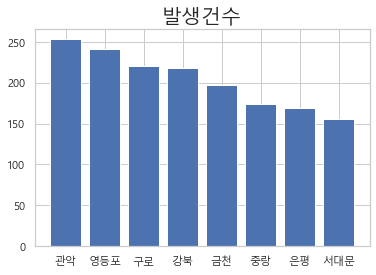

In [24]:
index = np.arange(8)
plt.bar('seoul_sgg','occrrnc_cnt',data=occrrnc[0:8])
plt.title('발생건수', fontsize=20)
plt.show()

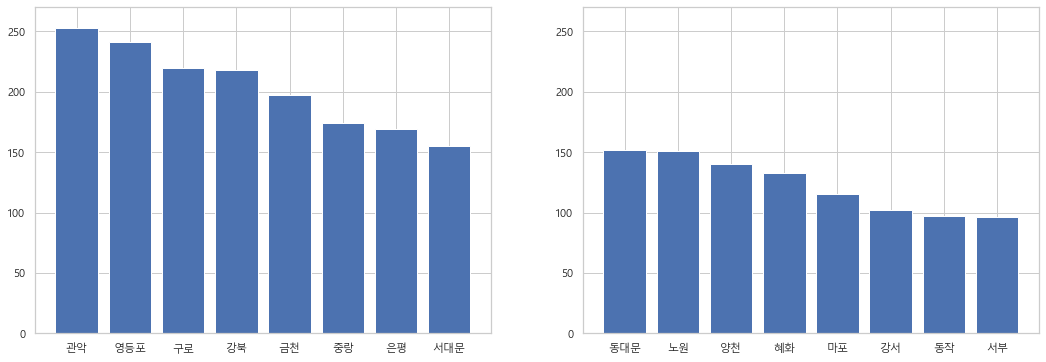

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

index = np.arange(8)

ax[0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[0:8])
ax[0].set_ylim([0, 270])
ax[1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[8:16])
ax[1].set_ylim([0, 270])
plt.show()

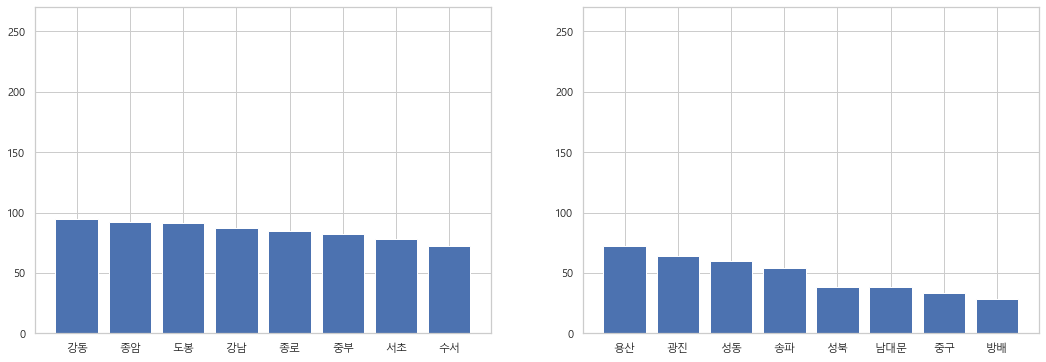

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

index = np.arange(8)

ax[0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[16:24])
ax[0].set_ylim([0, 270])
ax[1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[24:32])
ax[1].set_ylim([0, 270])
plt.show()

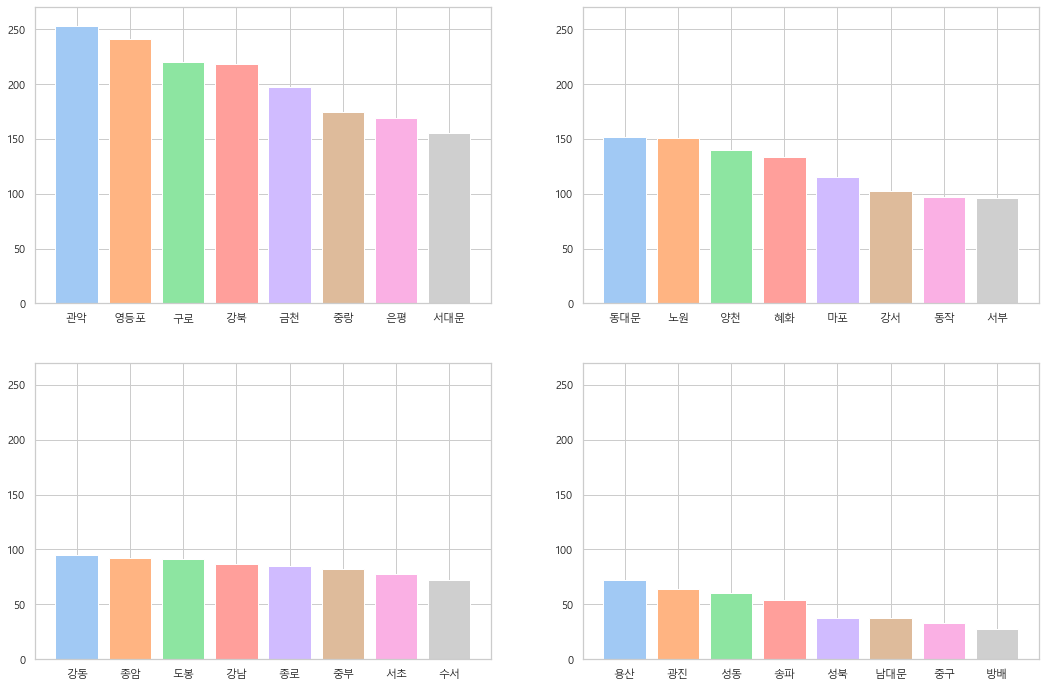

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

index = np.arange(8)

colors = sns.color_palette('pastel', len(index))

ax[0,0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[0:8], color=colors)
ax[0,0].set_ylim([0, 270])
ax[0,1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[8:16], color=colors)
ax[0,1].set_ylim([0, 270])
ax[1,0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[16:24], color=colors)
ax[1,0].set_ylim([0, 270])
ax[1,1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[24:32], color=colors)
ax[1,1].set_ylim([0, 270])

plt.show()

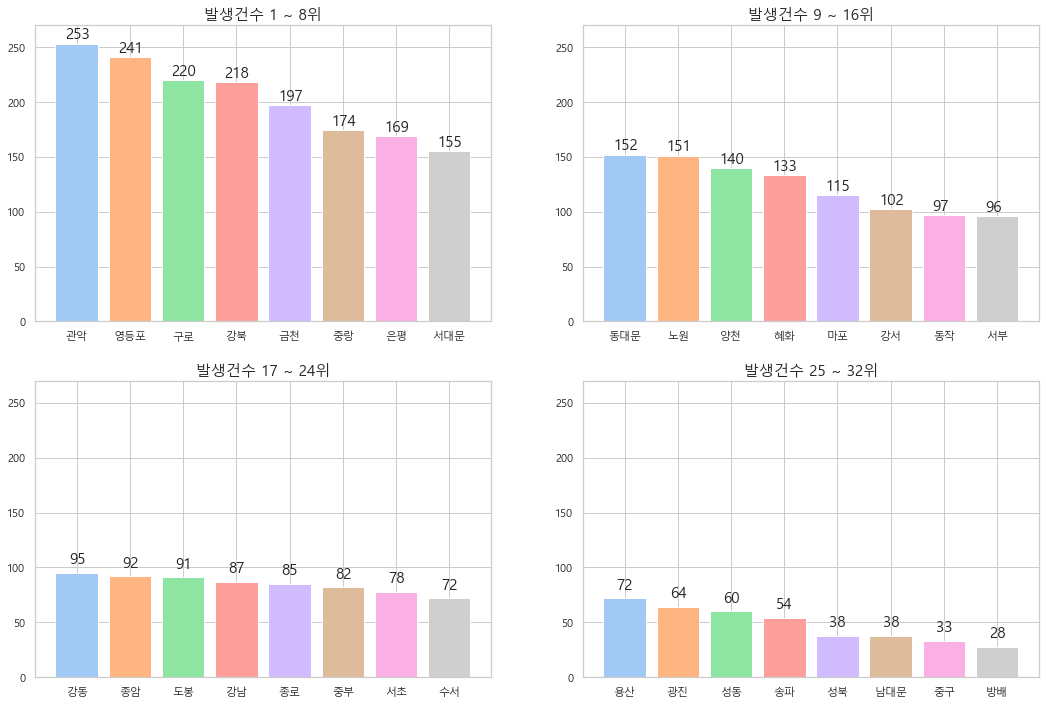

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

index = np.arange(8)

colors = sns.color_palette('pastel', len(index))

p1 = ax[0,0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[0:8], color=colors)
for bar in p1:
    ax[0,0].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.18, bar.get_height()+4), 
                     fontsize=15)
ax[0,0].set_ylim([0, 270])
ax[0,0].set_title('발생건수 1 ~ 8위',fontsize = 15)
p2 = ax[0,1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[8:16], color=colors)
for bar in p2:
    ax[0,1].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.18, bar.get_height()+4), 
                     fontsize=15)
ax[0,1].set_ylim([0, 270])
ax[0,1].set_title('발생건수 9 ~ 16위',fontsize = 15)
p3 =ax[1,0].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[16:24], color=colors)
for bar in p3:
    ax[1,0].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.25, bar.get_height()+8), 
                     fontsize=15)
ax[1,0].set_ylim([0, 270])
ax[1,0].set_title('발생건수 17 ~ 24위',fontsize = 15)
p4 = ax[1,1].bar('seoul_sgg','occrrnc_cnt',data=occrrnc[24:32], color=colors)
for bar in p4:
    ax[1,1].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.25, bar.get_height()+8), 
                     fontsize=15)
ax[1,1].set_ylim([0, 270])
ax[1,1].set_title('발생건수 25 ~ 32위',fontsize = 15)

plt.show()

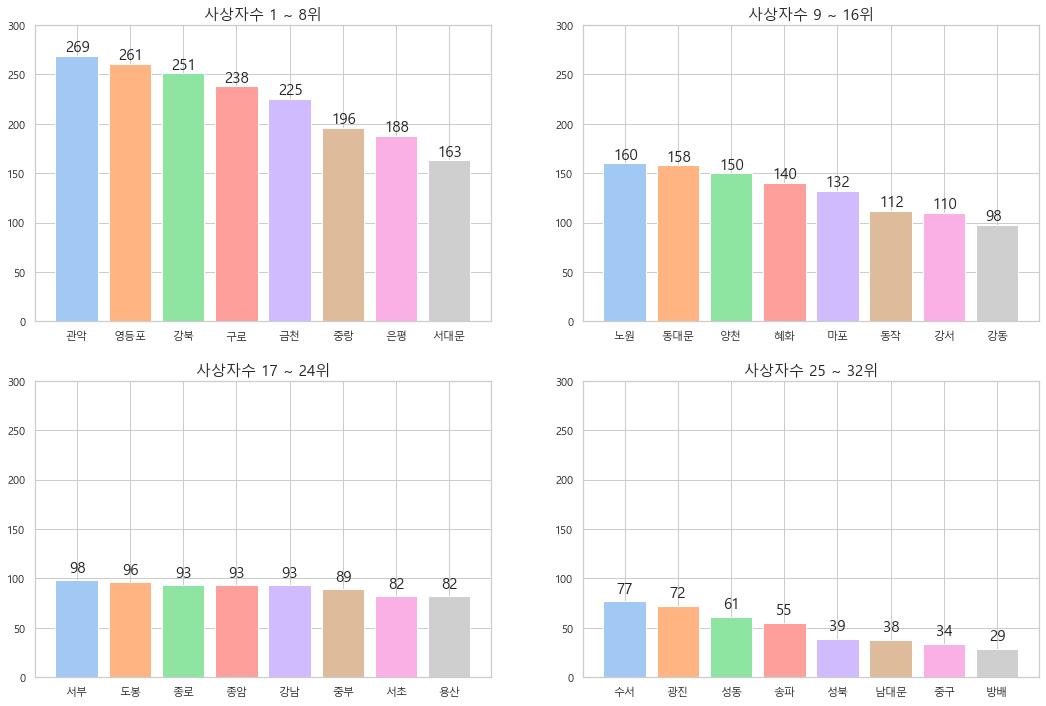

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

index = np.arange(8)

colors = sns.color_palette('pastel', len(index))

p1 = ax[0,0].bar('seoul_sgg','caslt_cnt',data=caslt[0:8], color=colors)
for bar in p1:
    ax[0,0].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.18, bar.get_height()+4), 
                     fontsize=15)
ax[0,0].set_ylim([0, 300])
ax[0,0].set_title('사상자수 1 ~ 8위',fontsize = 15)
p2 = ax[0,1].bar('seoul_sgg','caslt_cnt',data=caslt[8:16], color=colors)
for bar in p2:
    ax[0,1].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.18, bar.get_height()+4), 
                     fontsize=15)
ax[0,1].set_ylim([0, 300])
ax[0,1].set_title('사상자수 9 ~ 16위',fontsize = 15)
p3 =ax[1,0].bar('seoul_sgg','caslt_cnt',data=caslt[16:24], color=colors)
for bar in p3:
    ax[1,0].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.25, bar.get_height()+8), 
                     fontsize=15)
ax[1,0].set_ylim([0, 300])
ax[1,0].set_title('사상자수 17 ~ 24위',fontsize = 15)
p4 = ax[1,1].bar('seoul_sgg','caslt_cnt',data=caslt[24:32], color=colors)
for bar in p4:
    ax[1,1].annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.25, bar.get_height()+8), 
                     fontsize=15)
ax[1,1].set_ylim([0, 300])
ax[1,1].set_title('사상자수 25 ~ 32위',fontsize = 15)

plt.show()

# for bar in pl:
#     plt.annotate(bar.get_height(), 
#                  xy=(bar.get_x()+0.07, bar.get_height()+10), 
#                      fontsize=15)

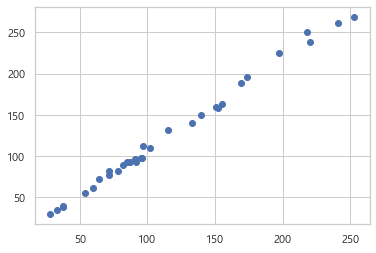

In [30]:
seoul_sgg_group = data.groupby('seoul_sgg')['occrrnc_cnt','caslt_cnt'].sum().reset_index()
plt.scatter('occrrnc_cnt', 'caslt_cnt', data=seoul_sgg_group)
plt.show()

In [31]:
data['year'] = data['afos_id'].str[:4]
data.head()

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,lo_crd,la_crd,seoul_sgg,year
0,167320,2013114,1168010500,111122001,서울 서울강남1,4,4,0,3,1,0,127.05446947119,37.508720365953,강남,2013
1,167392,2013114,1168010500,111122002,서울 서울강남2,6,6,1,4,1,0,127.063329279024,37.508654302655,강남,2013
2,167338,2013114,1168010400,111122003,서울 서울강남3,7,8,0,5,3,0,127.052621723215,37.52484136204,강남,2013
3,167220,2013114,1168010800,111122004,서울 서울강남4,7,7,1,5,0,1,127.022665078332,37.508524016071,강남,2013
4,167171,2013114,1168010100,111134001,서울 서울수서1,4,4,0,3,1,0,127.037404836265,37.499884552931,수서,2013


In [32]:
data['year'].value_counts()

2020    89
2018    84
2014    79
2015    73
2021    62
2017    58
2019    56
2013    51
2016    37
Name: year, dtype: int64

In [33]:
year_occrrnc = data.groupby('year')['occrrnc_cnt'].sum().reset_index()
year_caslt = data.groupby('year')['caslt_cnt'].sum().reset_index()

In [34]:
year_occrrnc

,year,occrrnc_cnt
0,2013,325
1,2014,657
2,2015,556
3,2016,288
4,2017,309
5,2018,474
6,2019,302
7,2020,485
8,2021,286


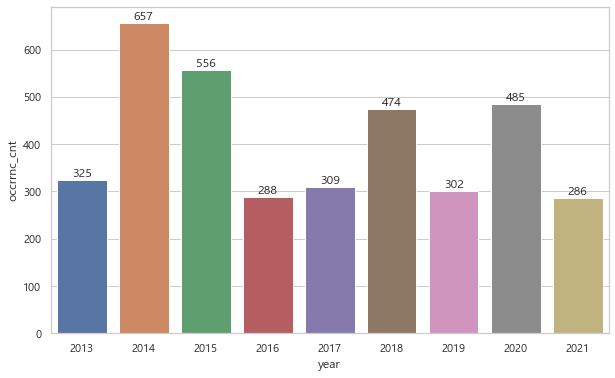

In [35]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x= 'year',y='occrrnc_cnt', data=year_occrrnc)
for i in ax.containers:
    ax.bar_label(i,)

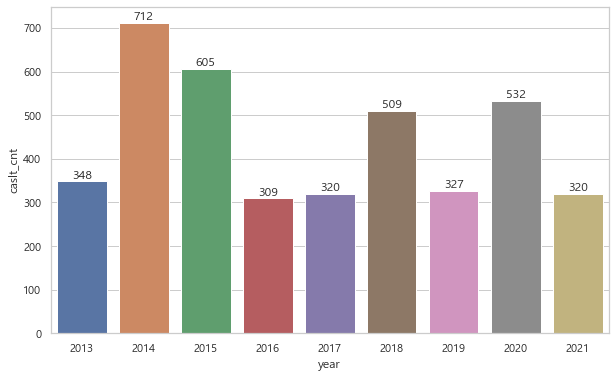

In [36]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x= 'year',y='caslt_cnt', data=year_caslt)
for i in ax.containers:
    ax.bar_label(i,)

In [37]:
df_year = data.groupby(['year','seoul_sgg'])['occrrnc_cnt', 'caslt_cnt'].sum().reset_index()
df_year

,year,seoul_sgg,occrrnc_cnt,caslt_cnt
0,2013,강남,24,25
1,2013,강동,4,4
2,2013,강북,27,33
3,2013,강서,4,4
4,2013,관악,32,35
...,...,...,...,...
218,2021,은평,15,16
219,2021,종로,5,5
220,2021,종암,23,23
221,2021,중랑,19,22


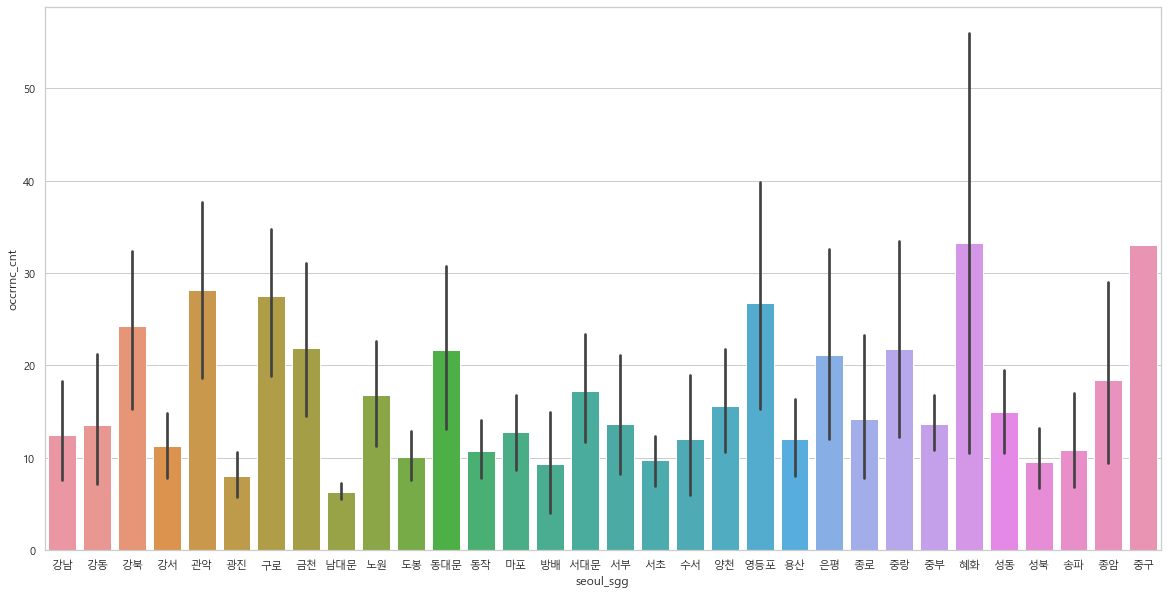

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x='seoul_sgg', y='occrrnc_cnt' ,data=df_year)
plt.show()

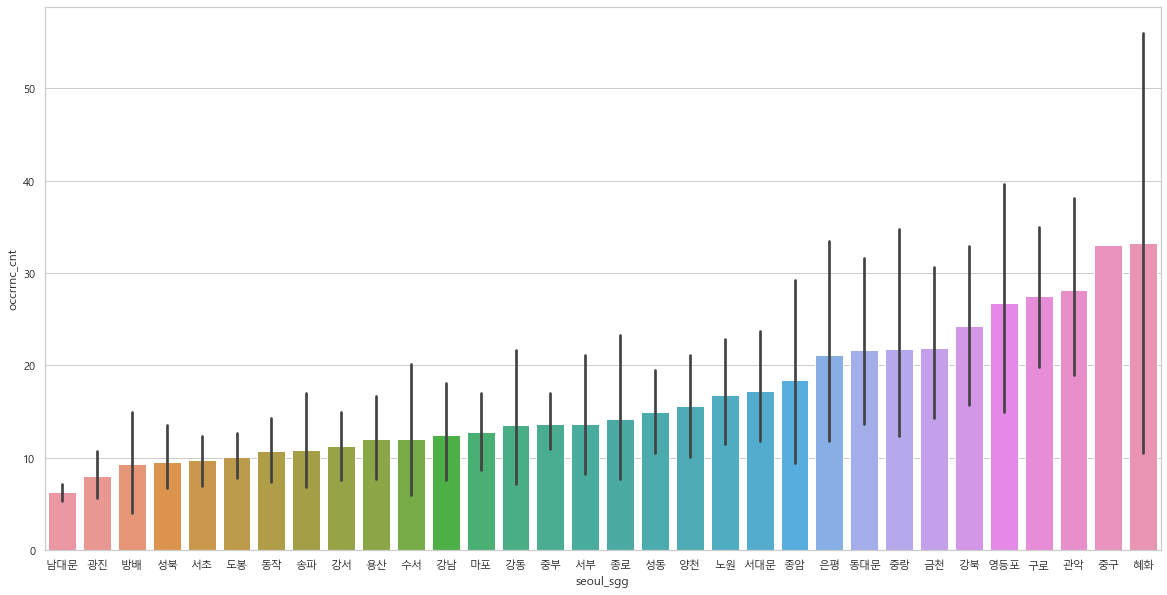

In [39]:
plt.figure(figsize=(20,10))
orders =df_year.groupby('seoul_sgg')['occrrnc_cnt'].mean().sort_values().index
sns.barplot(x='seoul_sgg', y='occrrnc_cnt' ,data=df_year, order=orders)
plt.show()

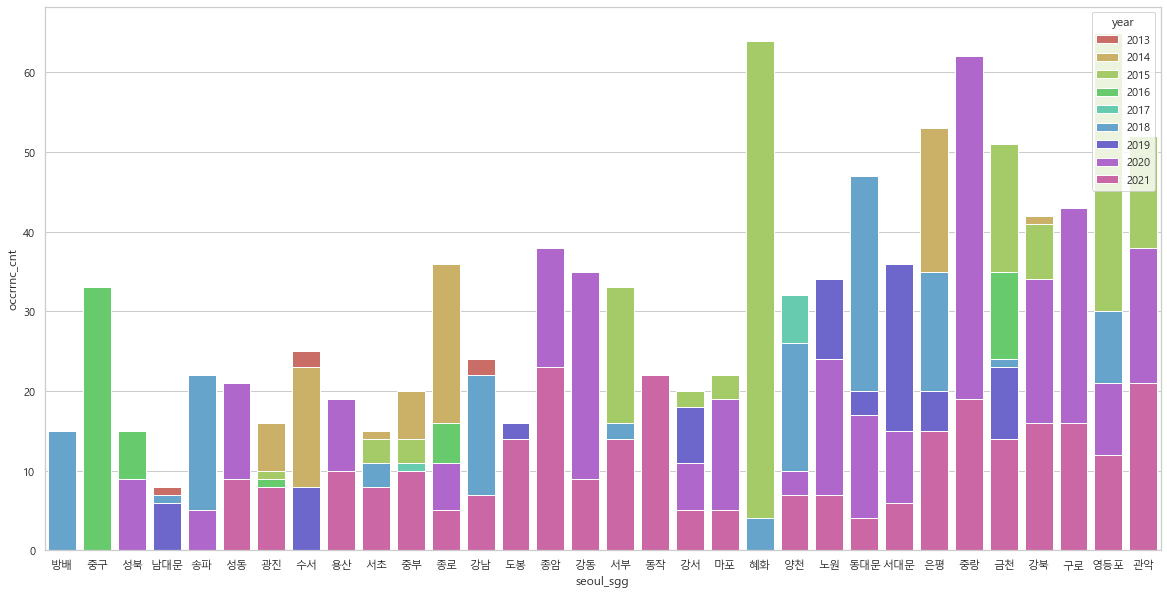

In [40]:
plt.figure(figsize=(20,10))
orders =df_year.groupby('seoul_sgg')['occrrnc_cnt'].sum().sort_values().index
sns.barplot(x='seoul_sgg', y='occrrnc_cnt', hue='year', dodge=False,palette='hls' ,data=df_year, order=orders)
plt.show()

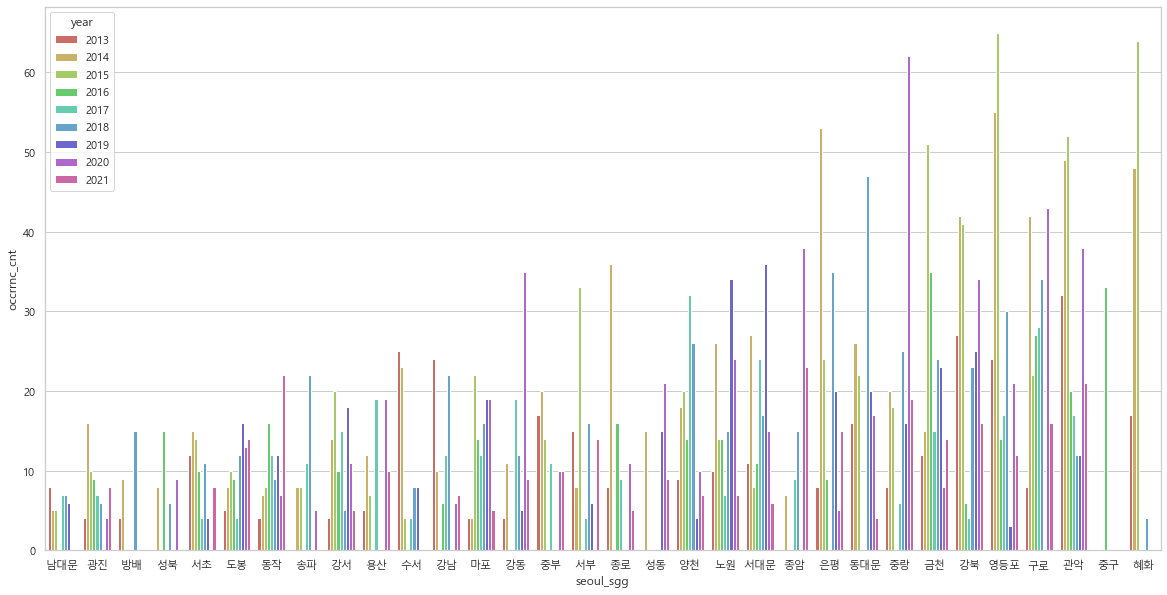

In [41]:
plt.figure(figsize=(20,10))
orders =df_year.groupby('seoul_sgg')['occrrnc_cnt'].mean().sort_values().index
sns.barplot(x='seoul_sgg', y='occrrnc_cnt', hue='year',palette='hls' ,data=df_year, order=orders)
plt.show()

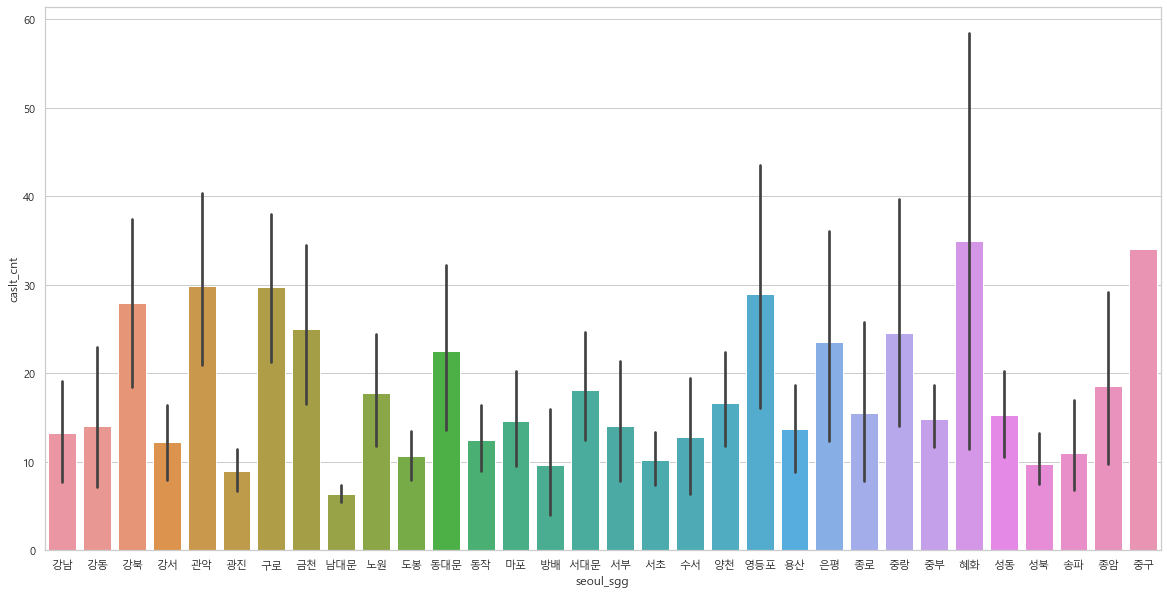

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='seoul_sgg', y='caslt_cnt' ,data=df_year)
plt.show()

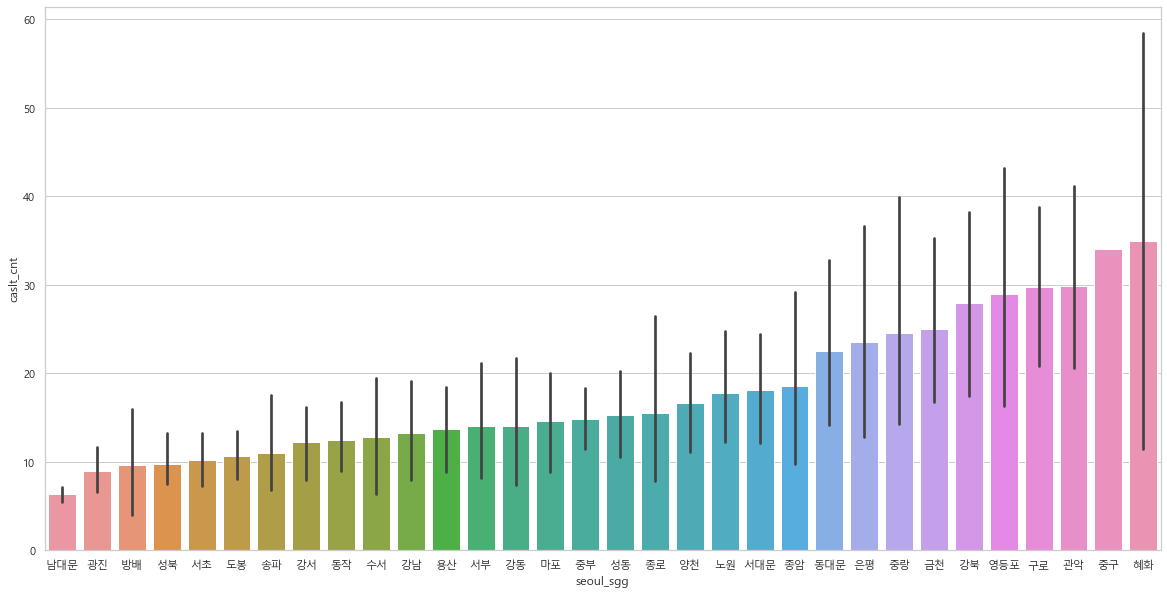

In [43]:
plt.figure(figsize=(20,10))
orders =df_year.groupby('seoul_sgg')['caslt_cnt'].mean().sort_values().index
sns.barplot(x='seoul_sgg', y='caslt_cnt' ,data=df_year, order=orders)
plt.show()

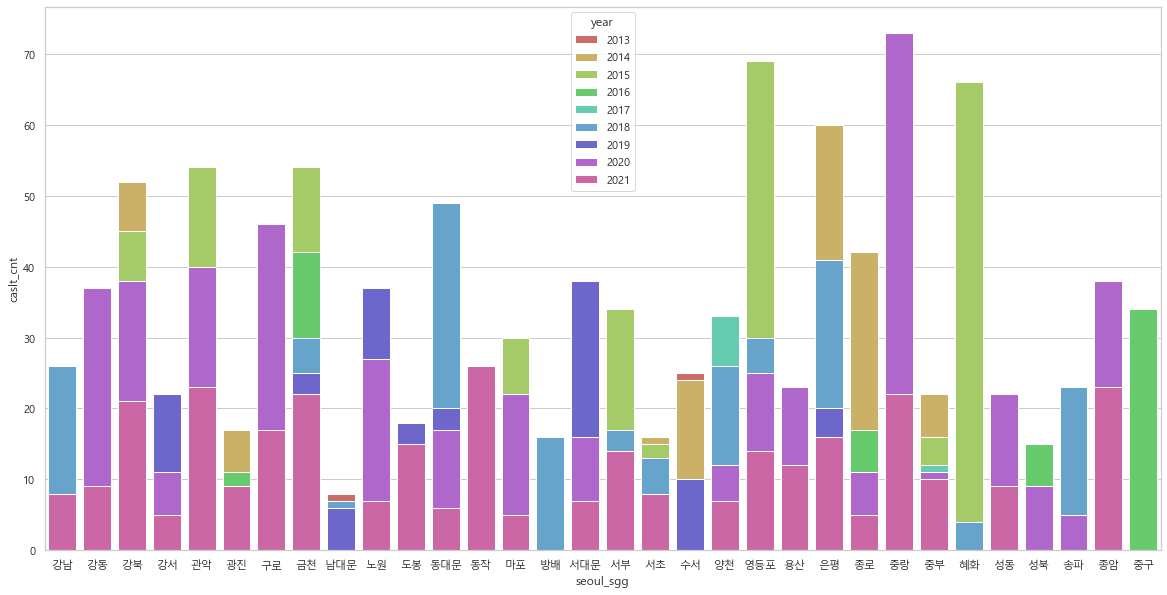

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x='seoul_sgg', y='caslt_cnt', hue='year', dodge=False,palette='hls' ,data=df_year)
plt.show()

In [45]:
df_year = data.groupby(['year','seoul_sgg'])['occrrnc_cnt', 'caslt_cnt'].sum().sort_values(by=['year','occrrnc_cnt', 'caslt_cnt'], ascending=[True, False, False]).reset_index()
df_year

,year,seoul_sgg,occrrnc_cnt,caslt_cnt
0,2013,관악,32,35
1,2013,강북,27,33
2,2013,수서,25,25
3,2013,영등포,24,26
4,2013,강남,24,25
...,...,...,...,...
218,2021,서대문,6,7
219,2021,강서,5,5
220,2021,마포,5,5
221,2021,종로,5,5


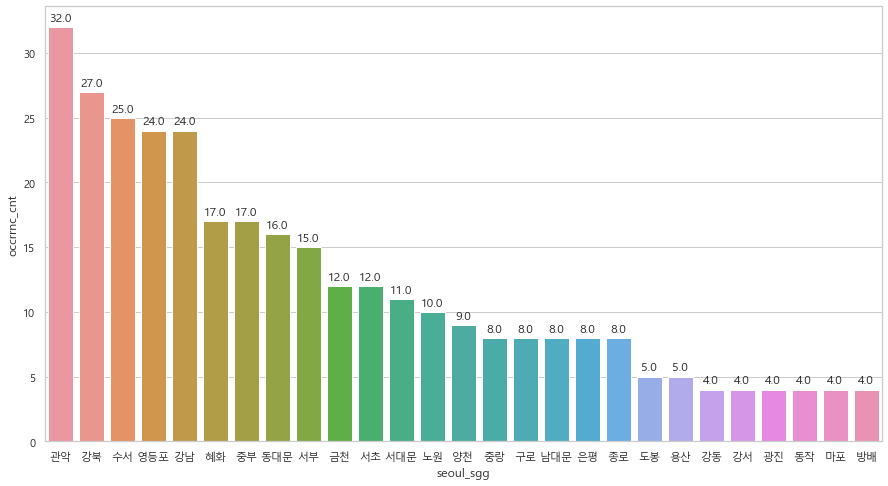

In [46]:
year_13 = df_year[df_year['year']=='2013']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

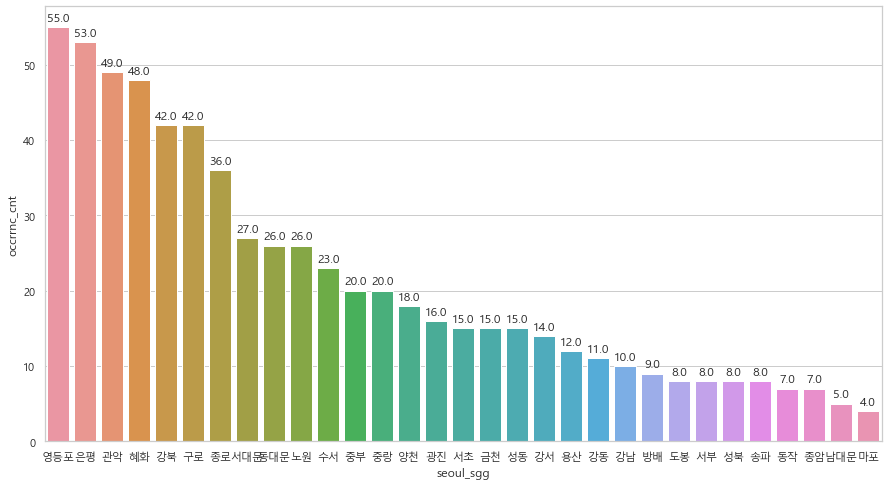

In [47]:
year_13 = df_year[df_year['year']=='2014']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

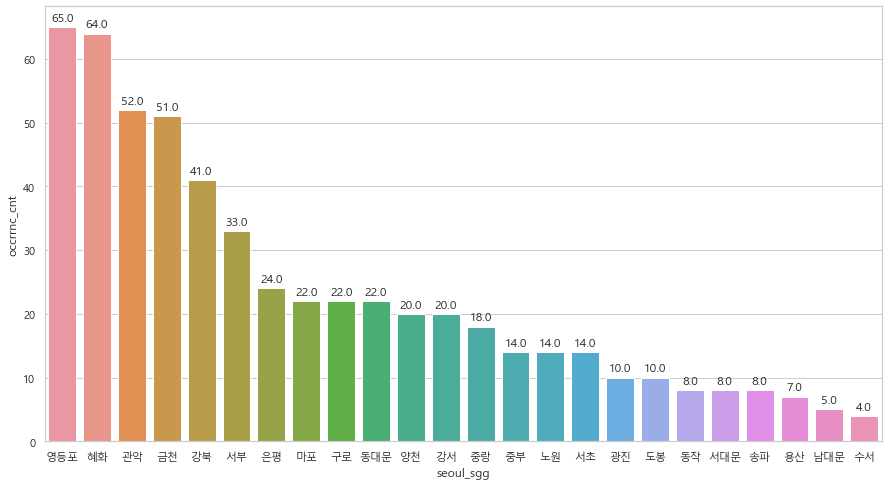

In [48]:
year_13 = df_year[df_year['year']=='2015']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

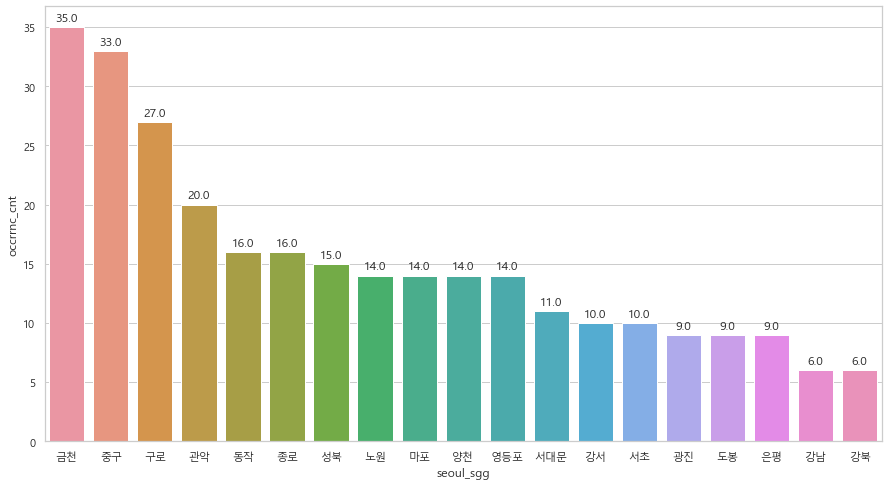

In [49]:
year_13 = df_year[df_year['year']=='2016']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

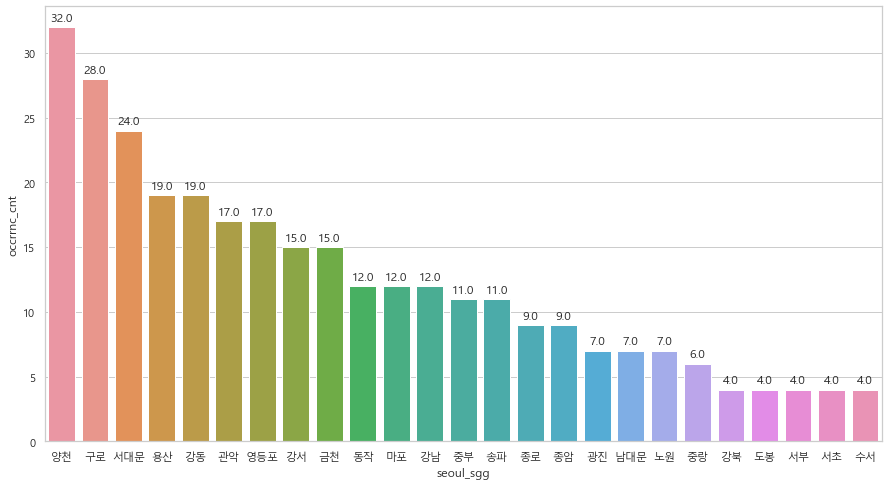

In [50]:
year_13 = df_year[df_year['year']=='2017']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

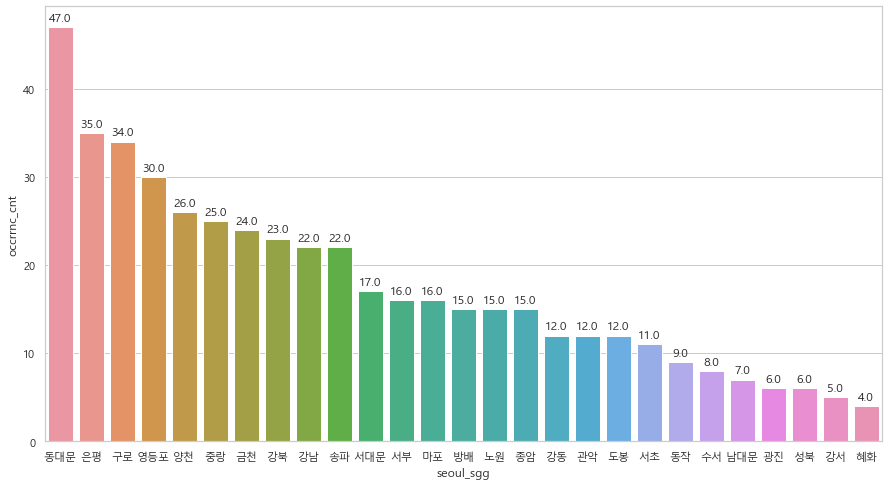

In [51]:
year_13 = df_year[df_year['year']=='2018']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

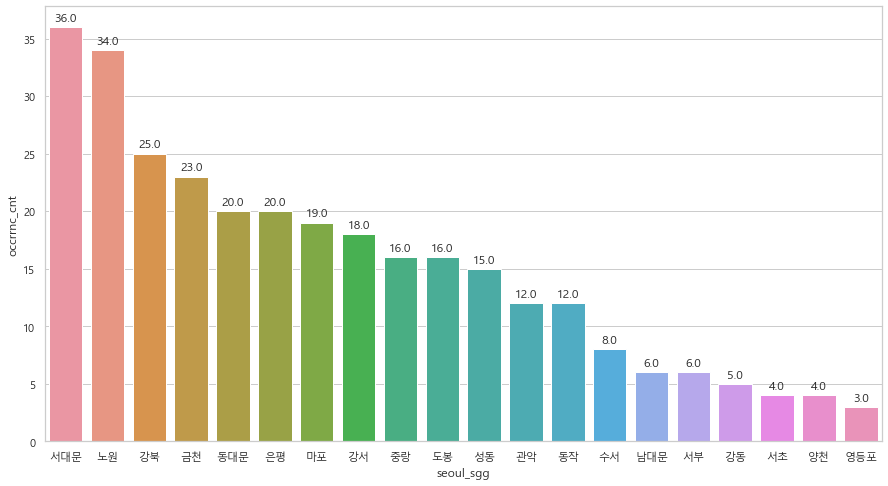

In [52]:
year_13 = df_year[df_year['year']=='2019']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

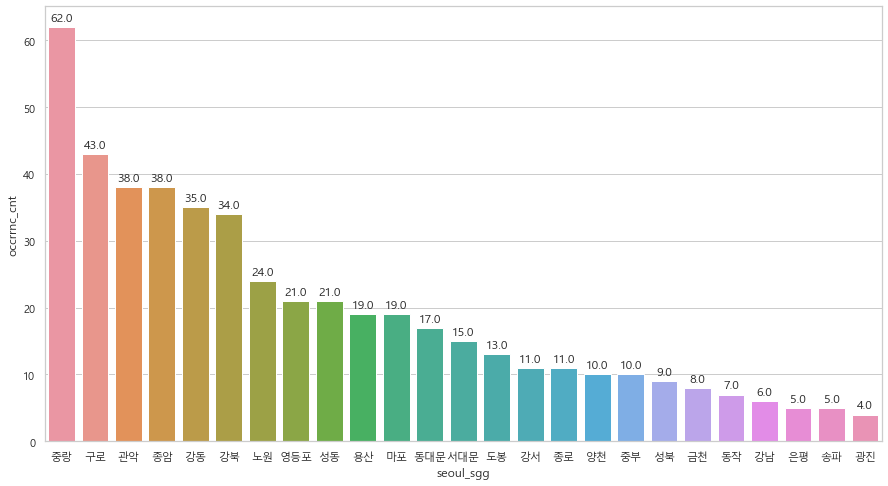

In [53]:
year_13 = df_year[df_year['year']=='2020']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

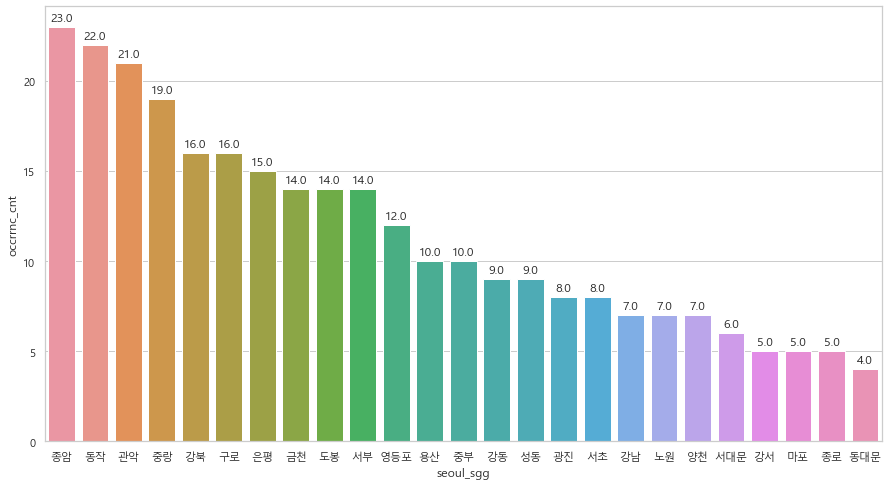

In [54]:
year_13 = df_year[df_year['year']=='2021']
plt.figure(figsize=(15,8))
pl = sns.barplot(x='seoul_sgg', y='occrrnc_cnt', data=year_13)

for p in pl.patches:
    pl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [55]:
new_data = pd.read_csv('./data/10_20_jaywalking.csv', encoding='cp949')

In [56]:
new_data.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,169921,2013114,1114015400,111104001,서울 서울중부1,서울특별시 중구 오장동(오장동사거리 부근),4,4,0,3,1,0,127.003907,37.564700,"{""type"":""Polygon"",""coordinates"":[[[127.0063079..."
1,167194,2013114,1114016500,111104002,서울 서울중부2,서울특별시 중구 황학동(신당중앙시장 부근),5,5,0,3,1,1,127.018625,37.565558,"{""type"":""Polygon"",""coordinates"":[[[127.0210259..."
2,167581,2013114,1114016200,111104003,서울 서울중부3,서울특별시 중구 신당동(운동장평화시장 부근),8,9,0,7,2,0,127.014246,37.567988,"{""type"":""Polygon"",""coordinates"":[[[127.0166473..."
3,167209,2013114,1114017100,111105001,서울 서울남대문1,서울특별시 중구 중림동(중림삼거리_청파로_진입 부근),4,4,0,3,0,1,126.968318,37.559948,"{""type"":""Polygon"",""coordinates"":[[[126.9707189..."
4,167544,2013114,1114011700,111105002,서울 서울남대문2,서울특별시 중구 남대문로4가(숭례문_남대문로_진입_1 부근),4,4,1,1,2,0,126.977640,37.561026,"{""type"":""Polygon"",""coordinates"":[[[126.980041,..."


In [57]:
new_data.drop('지점명', axis=1, inplace=True)

In [58]:
new_data['사고다발지ID'] = new_data['사고다발지ID'].astype(str)

In [59]:
new_data['year'] = new_data['사고다발지ID'].str[:4]

In [60]:
new_data.columns = data.columns

In [61]:
seoul_data = new_data[new_data['sido_sgg_nm'].str.contains('서울')]
seoul_data.shape

(589, 15)

In [62]:
seoul_data['seoul_sgg'] = seoul_data['sido_sgg_nm']
seoul_data['seoul_sgg'] = seoul_data['seoul_sgg'].apply(lambda x:x.replace('서울특별시', ''))
seoul_data['seoul_sgg'] = seoul_data['seoul_sgg'].apply(lambda x:x.replace('서울', ''))
seoul_data['seoul_sgg'] = seoul_data['seoul_sgg'].apply(lambda x:x.replace(' ', ''))
seoul_data['seoul_sgg'] = seoul_data['seoul_sgg'].str.replace('\d+', '')
seoul_data['seoul_sgg'] = seoul_data.seoul_sgg.apply(lambda x:x.replace('구', '') if len(x) >= 3 else x)
seoul_data[seoul_data['seoul_sgg']=='로'] = seoul_data[seoul_data['seoul_sgg']=='로'].apply(lambda x:x.replace('로', '구로'))

In [63]:
seoul_data.head()

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,lo_crd,la_crd,seoul_sgg,year
0,169921,2013114,1114015400,111104001,서울 서울중부1,4,4,0,3,1,0,127.003907,37.564700,중부,2013
1,167194,2013114,1114016500,111104002,서울 서울중부2,5,5,0,3,1,1,127.018625,37.565558,중부,2013
2,167581,2013114,1114016200,111104003,서울 서울중부3,8,9,0,7,2,0,127.014246,37.567988,중부,2013
3,167209,2013114,1114017100,111105001,서울 서울남대문1,4,4,0,3,0,1,126.968318,37.559948,남대문,2013
4,167544,2013114,1114011700,111105002,서울 서울남대문2,4,4,1,1,2,0,126.977640,37.561026,남대문,2013


In [64]:
import folium
lat = seoul_data['la_crd'].mean()
long = seoul_data['lo_crd'].mean()

m = folium.Map([lat,long],zoom_start=12)

In [65]:
for i in seoul_data.index:
    sub_lat =  seoul_data.loc[i,'la_crd']
    sub_long = seoul_data.loc[i,'lo_crd']
    
    title = seoul_data.loc[i,'year']
    
    folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)
m